Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv(r'C:\Users\ashok\Downloads\PG\PGP Data Science\Machine Learning\Download\Mercedes\train.csv')
test = pd.read_csv(r'C:\Users\ashok\Downloads\PG\PGP Data Science\Machine Learning\Download\Mercedes\test.csv')

In [5]:
train.shape

(4209, 378)

In [6]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
#columns in dataset
print(list(train.columns))

['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X14

In [12]:
#check unique value in ID column
print(train.ID.unique())
print(train.ID.nunique())

[   0    6    7 ... 8412 8415 8417]
4209


In [13]:
#ID column has unique ID for each row, we can drop this column.
train.drop('ID',axis=1,inplace=True)

In [14]:
#check column variance
var_df = pd.DataFrame(np.var(train,0), columns=['variance'])

In [15]:
#find column list with zero variance
zero_var = list((var_df[var_df['variance']==0]).index)
print(zero_var)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [16]:
#drop zero_var columns
train.drop(zero_var,axis=1, inplace=True)

In [17]:
train.shape

(4209, 365)

In [18]:
#check for unique value and null value
train.isna().sum().value_counts()

0    365
dtype: int64

In [19]:
# apply label encoder
obj_col=[]
for i in train.columns:
    a=train[i].dtype
    if a=='object':
        obj_col.append(i)


In [20]:
obj_col

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [21]:
for i in obj_col:
    print(i, train[i].nunique())

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12
X8 25


In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in obj_col:
    train[i]=LE.fit_transform(train[i])

In [23]:
train1 = pd.DataFrame(train, columns=train.columns)
print(train1)

           y  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X375  X376  X377  \
0     130.81  32  23  17   0   3  24   9  14    0  ...     0     0     1   
1      88.53  32  21  19   4   3  28  11  14    0  ...     1     0     0   
2      76.26  20  24  34   2   3  27   9  23    0  ...     0     0     0   
3      80.62  20  21  34   5   3  27  11   4    0  ...     0     0     0   
4      78.02  20  23  34   5   3  12   3  13    0  ...     0     0     0   
...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   
4204  107.39   8  20  16   2   3   0   3  16    0  ...     1     0     0   
4205  108.77  31  16  40   3   3   0   7   7    0  ...     0     1     0   
4206  109.22   8  23  38   0   3   0   6   4    0  ...     0     0     1   
4207   87.48   9  19  25   5   3   0  11  20    0  ...     0     0     0   
4208  110.85  46  19   3   2   3   0   6  22    0  ...     1     0     0   

      X378  X379  X380  X382  X383  X384  X385  
0        0     0     0     0     0    

In [24]:
#defining variables
X_data = train1.drop('y',axis=1)
Y_data = train1['y']

In [25]:
X_data.shape

(4209, 364)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [28]:
Principal_comp = pca.fit(X_data)

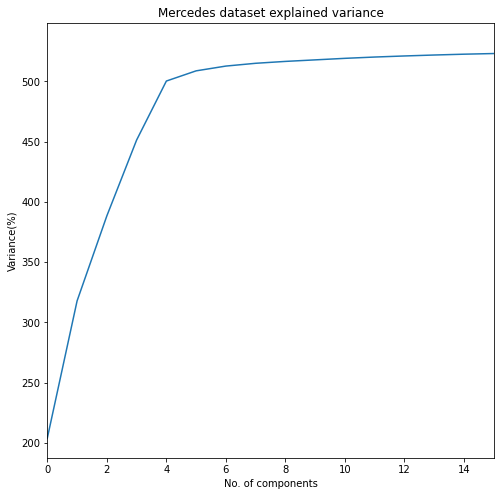

In [29]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_))
plt.title('Mercedes dataset explained variance')
plt.xlabel('No. of components')
plt.ylabel('Variance(%)')
plt.xlim(0,15)
plt.show()

In [30]:
pca = PCA(n_components=5)
Principal_data = pca.fit_transform(X_data)
pca.explained_variance_ratio_.sum()

0.9401733147573696

In [31]:
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008])

In [32]:
Principal_data = pd.DataFrame(Principal_data)

In [33]:
#fit XGboost regressor
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=.25, random_state=50)

In [34]:
X_test.shape

(1053, 364)

In [37]:
!pip install "xgboost"

In [38]:
from xgboost import XGBRegressor

In [39]:
XGB = XGBRegressor()

In [40]:
XGB.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred = XGB.predict(X_test)

C:\Users\ashok\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [42]:
from sklearn.metrics import accuracy_score


In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(Y_test, y_pred)

0.44616457378590235